<a href="https://colab.research.google.com/github/nehagupta2103/MNIST-Neural-Network/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/My Drive/CV projects/train.csv') 
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([2, 6, 2, ..., 3, 0, 0])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 4 8 ... 5 4 8] [2 6 2 ... 3 0 0]
0.07417073170731707
Iteration:  10
[5 6 0 ... 5 8 8] [2 6 2 ... 3 0 0]
0.17336585365853657
Iteration:  20
[5 6 0 ... 5 0 0] [2 6 2 ... 3 0 0]
0.27519512195121953
Iteration:  30
[1 6 0 ... 5 0 0] [2 6 2 ... 3 0 0]
0.37185365853658536
Iteration:  40
[1 6 0 ... 5 0 0] [2 6 2 ... 3 0 0]
0.4395121951219512
Iteration:  50
[1 6 0 ... 3 0 0] [2 6 2 ... 3 0 0]
0.49590243902439024
Iteration:  60
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.5419268292682927
Iteration:  70
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.5811219512195122
Iteration:  80
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.6144634146341463
Iteration:  90
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.641
Iteration:  100
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.6643902439024391
Iteration:  110
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.6851707317073171
Iteration:  120
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.7012439024390243
Iteration:  130
[1 6 2 ... 3 0 0] [2 6 2 ... 3 0 0]
0.7173658536585366
Iteration:  140
[1 6 2 ..

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


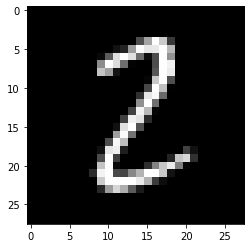

Prediction:  [6]
Label:  6


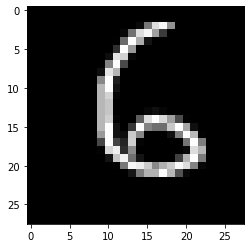

Prediction:  [2]
Label:  2


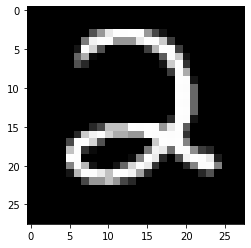

Prediction:  [1]
Label:  1


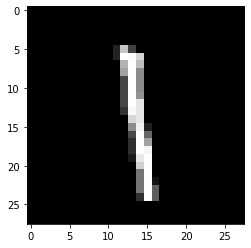

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 3 2 5 9 9 9 6 8 5 1 3 3 7 5 6 0 8 1 8 2 3 0 5 6 3 5 5 2 4 0 0 1 3 8 7
 1 5 1 7 2 9 1 1 5 0 3 8 4 0 4 7 3 6 0 5 4 4 0 1 4 6 5 9 4 3 5 6 4 9 3 2 4
 1 3 2 3 3 5 1 7 9 0 7 2 7 2 2 8 7 4 0 2 3 7 7 3 5 3 8 1 3 3 4 8 6 8 5 5 9
 1 2 1 2 8 6 2 4 9 5 2 4 7 7 2 7 2 2 6 0 4 7 9 1 4 7 2 7 1 8 9 1 1 3 6 1 5
 6 3 1 8 9 4 3 8 2 8 6 2 7 6 7 7 5 2 0 7 5 3 0 0 9 3 8 9 5 3 8 1 7 2 2 5 7
 3 3 4 2 0 4 4 3 2 5 4 4 0 4 1 8 6 6 3 0 6 6 9 4 2 7 4 3 2 7 6 3 8 3 5 7 6
 4 7 7 2 8 7 0 7 0 0 9 2 5 6 3 0 7 8 0 2 5 3 2 7 9 4 0 7 3 8 1 9 2 0 1 4 2
 5 6 6 2 0 9 6 6 3 2 6 0 1 6 1 3 2 8 2 2 5 6 1 9 6 4 3 5 0 4 3 7 6 3 4 1 7
 1 2 3 4 9 1 1 2 4 9 3 7 1 0 8 0 7 5 0 0 8 6 7 6 7 9 0 0 2 2 8 2 8 1 1 3 3
 6 6 7 1 4 0 8 2 1 8 7 1 4 8 3 8 1 1 7 4 6 2 9 8 2 4 7 3 6 9 9 2 8 7 2 0 4
 9 7 3 8 3 2 4 6 5 1 4 6 8 1 8 1 5 4 4 7 5 0 3 8 8 0 5 7 3 2 8 6 1 5 2 7 2
 6 6 4 7 7 6 6 9 0 2 3 1 0 3 6 0 6 1 1 0 4 1 9 0 9 5 4 4 9 0 7 2 9 6 5 5 1
 8 1 1 4 5 7 7 0 4 2 0 5 4 1 2 5 1 3 9 1 8 9 1 3 9 8 4 9 4 4 4 4 1 6 0 5 3
 8 8 2 2 5 1 6 8 0 8 5 3 

0.861